<a href="https://colab.research.google.com/github/Jean-Rd/Algoritms_Intro_machineLearningWithPython/blob/master/AnalisisUPEA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url = r'https://raw.githubusercontent.com/Jean-Rd/Datasets/master/Modalidad%20Online-UPEA.csv'

In [165]:
data = pd.read_csv(url)

data.head()

,Timestamp,Carrera a la que pertenece:,Esta de acuerdo con habilitar un curso virtual para toda su carrera:,El mejor beneficio de estudiar a distancia:,La peor desventaja de estudiar a distancia:,Edad:,Sexo:,Trabaja:
0,2020/11/08 4:59:28 AM AST,Ingeniería de Sistemas,Si.,Horario flexible.,Contacto Personal Docente-Estudiantil.,20,Hombre,Eventual
1,2020/11/08 5:36:59 AM AST,Psicología,Si.,Acceso desde cualquier lugar.,Contacto Personal Docente-Estudiantil.,26,Hombre,Eventual
2,2020/11/08 5:51:15 AM AST,Ingeniería de Sistemas,Si.,Horario flexible.,"Falta de recursos de calidad(plataformas, doce...",20,Mujer,Sí
3,2020/11/08 6:15:12 AM AST,Ingeniería de Sistemas,Si.,Horario flexible.,Conexión a internet.,18,Mujer,No
4,2020/11/08 6:23:28 AM AST,Ingeniería de Sistemas,Si.,Acceso desde cualquier lugar.,Contacto Personal Docente-Estudiantil.,39,Hombre,Sí


In [166]:
data.Timestamp.dtype

dtype('O')

In [167]:
data.Timestamp.str.len().value_counts()

25    187
26     69
Name: Timestamp, dtype: int64

In [169]:
data['Timestamp'] = [i[0:10] for i in data.Timestamp]

In [170]:
data.Timestamp = pd.to_datetime(data.Timestamp)

In [171]:
print(data.Timestamp.dtype)

data.columns

datetime64[ns]


Index(['Timestamp', 'Carrera a la que pertenece:',
       'Esta de acuerdo con habilitar un curso virtual para toda su carrera:',
       'El mejor beneficio de estudiar a distancia:',
       'La peor desventaja de estudiar a distancia:', 'Edad:', 'Sexo:',
       'Trabaja:'],
      dtype='object')

In [172]:
data.columns = ['time', 'carrera', 'acepta', 'positivo', 'negativo', 'edad', 'sexo', 'trabajo']

data.head()

,time,carrera,acepta,positivo,negativo,edad,sexo,trabajo
0,2020-11-08,Ingeniería de Sistemas,Si.,Horario flexible.,Contacto Personal Docente-Estudiantil.,20,Hombre,Eventual
1,2020-11-08,Psicología,Si.,Acceso desde cualquier lugar.,Contacto Personal Docente-Estudiantil.,26,Hombre,Eventual
2,2020-11-08,Ingeniería de Sistemas,Si.,Horario flexible.,"Falta de recursos de calidad(plataformas, doce...",20,Mujer,Sí
3,2020-11-08,Ingeniería de Sistemas,Si.,Horario flexible.,Conexión a internet.,18,Mujer,No
4,2020-11-08,Ingeniería de Sistemas,Si.,Acceso desde cualquier lugar.,Contacto Personal Docente-Estudiantil.,39,Hombre,Sí


In [173]:
data = pd.DataFrame(data)

data.head()

,time,carrera,acepta,positivo,negativo,edad,sexo,trabajo
0,2020-11-08,Ingeniería de Sistemas,Si.,Horario flexible.,Contacto Personal Docente-Estudiantil.,20,Hombre,Eventual
1,2020-11-08,Psicología,Si.,Acceso desde cualquier lugar.,Contacto Personal Docente-Estudiantil.,26,Hombre,Eventual
2,2020-11-08,Ingeniería de Sistemas,Si.,Horario flexible.,"Falta de recursos de calidad(plataformas, doce...",20,Mujer,Sí
3,2020-11-08,Ingeniería de Sistemas,Si.,Horario flexible.,Conexión a internet.,18,Mujer,No
4,2020-11-08,Ingeniería de Sistemas,Si.,Acceso desde cualquier lugar.,Contacto Personal Docente-Estudiantil.,39,Hombre,Sí


In [174]:
data.time.dtype

dtype('<M8[ns]')

In [175]:
data.positivo.unique()

imp = ['Horario flexible.', 'Acceso desde cualquier lugar.', 'Autonomía.']

index = [i for i, j in enumerate(data.positivo) if j in imp]

data = data.iloc[index, :]

data.head()

,time,carrera,acepta,positivo,negativo,edad,sexo,trabajo
0,2020-11-08,Ingeniería de Sistemas,Si.,Horario flexible.,Contacto Personal Docente-Estudiantil.,20,Hombre,Eventual
1,2020-11-08,Psicología,Si.,Acceso desde cualquier lugar.,Contacto Personal Docente-Estudiantil.,26,Hombre,Eventual
2,2020-11-08,Ingeniería de Sistemas,Si.,Horario flexible.,"Falta de recursos de calidad(plataformas, doce...",20,Mujer,Sí
3,2020-11-08,Ingeniería de Sistemas,Si.,Horario flexible.,Conexión a internet.,18,Mujer,No
4,2020-11-08,Ingeniería de Sistemas,Si.,Acceso desde cualquier lugar.,Contacto Personal Docente-Estudiantil.,39,Hombre,Sí


In [176]:
data.positivo.value_counts()

Horario flexible.                126
Acceso desde cualquier lugar.    104
Autonomía.                        18
Name: positivo, dtype: int64

In [177]:
data.negativo.unique()

imp2 = ['Contacto Personal Docente-Estudiantil.', 'Falta de recursos de calidad(plataformas, docentes).', 'Conexión a internet.']

index2 = [i for i,j in enumerate(data.negativo) if j in imp2]

data = data.iloc[index2, :]

In [178]:
data.negativo.value_counts()

Conexión a internet.                                    95
Contacto Personal Docente-Estudiantil.                  84
Falta de recursos de calidad(plataformas, docentes).    56
Name: negativo, dtype: int64

In [179]:
df = pd.DataFrame(np.copy(data))


In [247]:
data.edad.unique()

edad_del = ['artesgrafer@gmail.com', '-']

data = data.dropna()

idx_edad = [i for i,j in enumerate(data.edad) if not (j in edad_del)]
val_edad = [j[:2] for i,j in enumerate(data.edad) if not (j in edad_del)]

data = data.iloc[idx_edad, :]
data.edad = val_edad

data.shape

(222, 8)

In [248]:
data.sexo.unique()

array(['Hombre', 'Mujer'], dtype=object)

In [249]:
data.trabajo.unique()

array(['Eventual', 'Sí', 'No'], dtype=object)

In [250]:
data.acepta.unique()

array(['Si.', 'No'], dtype=object)

In [251]:
df = pd.DataFrame(np.copy(data))

In [252]:
data.acepta = ['Si' if i == 'Si.' else 'No' for i in data.acepta]
data.acepta.unique()

array(['Si', 'No'], dtype=object)

In [258]:
sns.set_style('whitegrid')

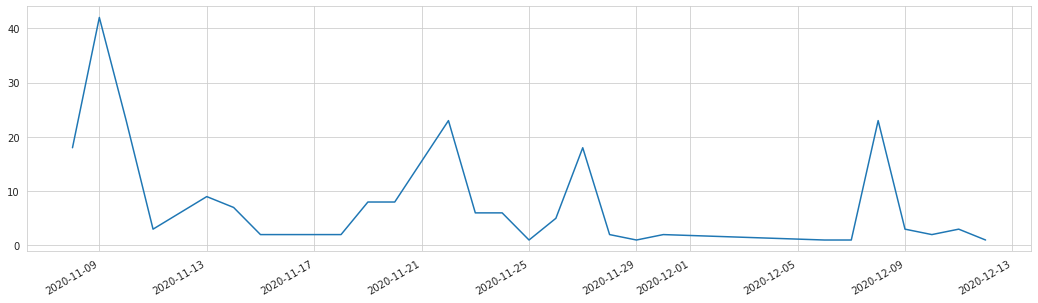

In [263]:
plt.figure(figsize=(18,5))

data.time.value_counts().plot.line()
plt.show()

In [264]:
data.to_csv('ModalidadVirtual.csv')

In [267]:
data.head()

,time,carrera,acepta,positivo,negativo,edad,sexo,trabajo
0,2020-11-08,Ingeniería de Sistemas,Si,Horario flexible.,Contacto Personal Docente-Estudiantil.,20,Hombre,Eventual
1,2020-11-08,Psicología,Si,Acceso desde cualquier lugar.,Contacto Personal Docente-Estudiantil.,26,Hombre,Eventual
2,2020-11-08,Ingeniería de Sistemas,Si,Horario flexible.,"Falta de recursos de calidad(plataformas, doce...",20,Mujer,Sí
3,2020-11-08,Ingeniería de Sistemas,Si,Horario flexible.,Conexión a internet.,18,Mujer,No
4,2020-11-08,Ingeniería de Sistemas,Si,Acceso desde cualquier lugar.,Contacto Personal Docente-Estudiantil.,39,Hombre,Sí


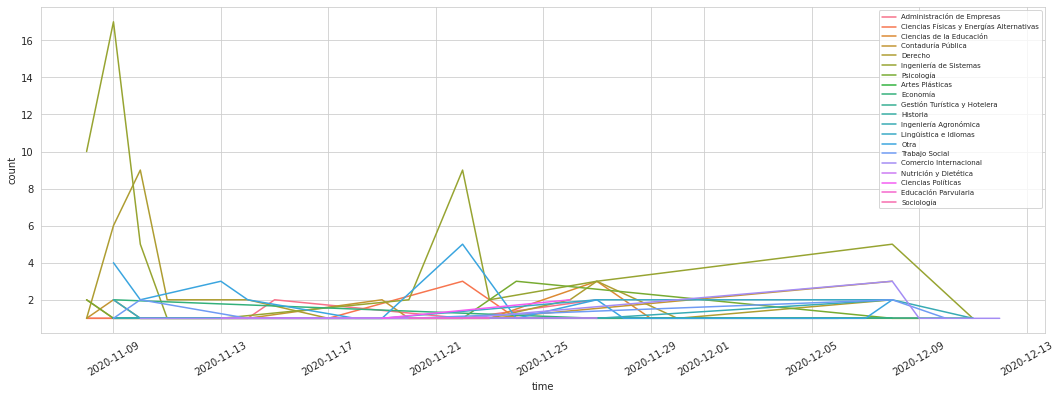

In [310]:
group_carrera = data.groupby(['time', 'carrera']).size().reset_index(name='count')

plt.figure(figsize=(18,6))

sns.lineplot(x='time', y='count', hue='carrera', data=group_carrera, legend='auto')
plt.legend(loc='upper right', fontsize='x-small')
plt.xticks(rotation=30)
plt.show()

In [311]:
data.head()

,time,carrera,acepta,positivo,negativo,edad,sexo,trabajo
0,2020-11-08,Ingeniería de Sistemas,Si,Horario flexible.,Contacto Personal Docente-Estudiantil.,20,Hombre,Eventual
1,2020-11-08,Psicología,Si,Acceso desde cualquier lugar.,Contacto Personal Docente-Estudiantil.,26,Hombre,Eventual
2,2020-11-08,Ingeniería de Sistemas,Si,Horario flexible.,"Falta de recursos de calidad(plataformas, doce...",20,Mujer,Sí
3,2020-11-08,Ingeniería de Sistemas,Si,Horario flexible.,Conexión a internet.,18,Mujer,No
4,2020-11-08,Ingeniería de Sistemas,Si,Acceso desde cualquier lugar.,Contacto Personal Docente-Estudiantil.,39,Hombre,Sí


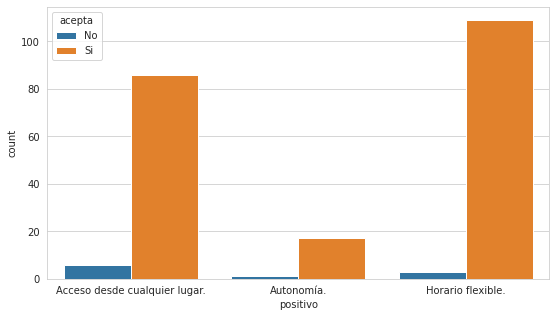

In [315]:
group_pos = data.groupby(['acepta', 'positivo']).size().reset_index(name='count')

plt.figure(figsize=(9,5))

sns.barplot(x='positivo', y='count', hue='acepta', data=group_pos)
plt.show()

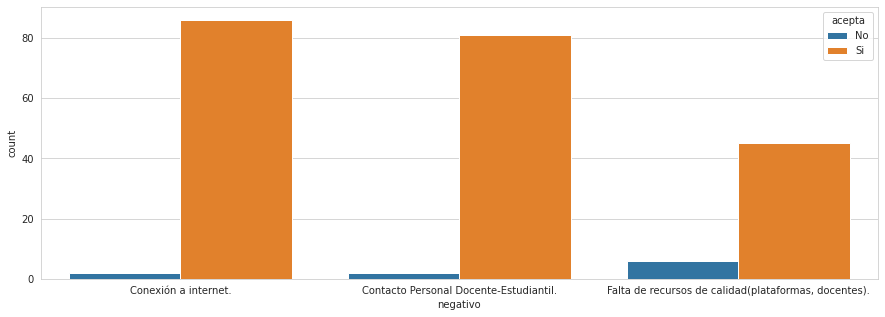

In [320]:
group_neg = data.groupby(['acepta', 'negativo']).size().reset_index(name='count')

plt.figure(figsize=(15,5))

sns.barplot(x='negativo', y='count', hue='acepta', data=group_neg)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


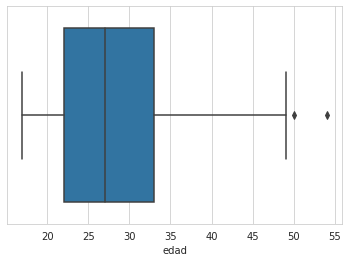

In [325]:
data.edad = data.edad.astype(int)

sns.boxplot(data.edad)

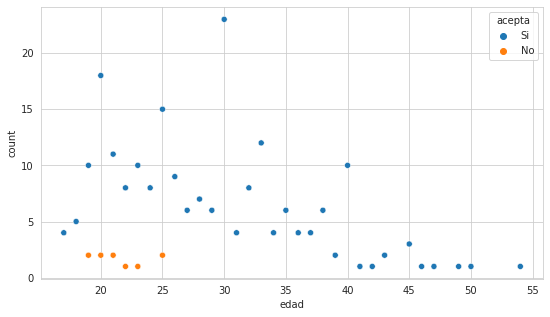

In [330]:
group_age = data.groupby(['edad', 'acepta']).size().reset_index(name='count')

plt.figure(figsize=(9,5))

sns.scatterplot(x='edad', y='count', hue='acepta', data=group_age)
plt.show()

<Figure size 648x360 with 0 Axes>

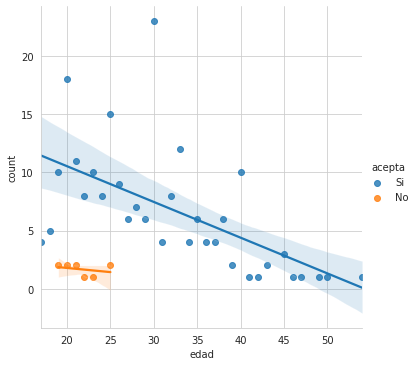

In [348]:
plt.figure(figsize=(9,5))

sns.lmplot(x='edad', y='count', hue='acepta', data=group_age)
plt.show()

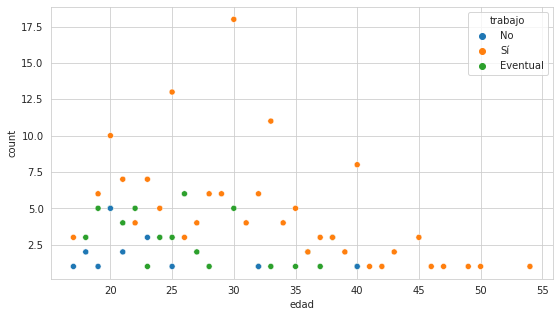

In [334]:
group_trabajo = data.groupby(['edad', 'trabajo']).size().reset_index(name='count')

plt.figure(figsize=(9,5))

sns.scatterplot(x='edad', y='count', hue='trabajo', data=group_trabajo)
plt.show()

<Figure size 648x360 with 0 Axes>

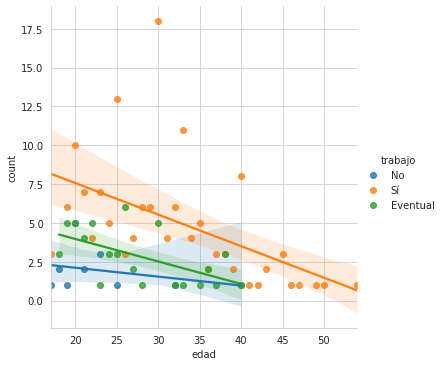

In [344]:
plt.figure(figsize=(9,5))

sns.lmplot(x='edad', y='count', hue='trabajo', data=group_trabajo, )
plt.show()

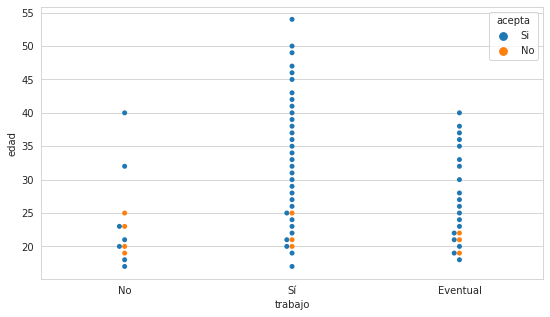

In [359]:
group_tra_acep = data.groupby(['edad', 'trabajo', 'acepta']).size().reset_index(name='count')

plt.figure(figsize=(9,5))

sns.swarmplot(x='trabajo', y='edad', hue='acepta', data=group_tra_acep)
plt.show()

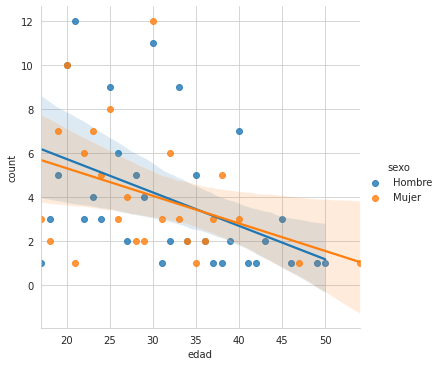

In [364]:
group_sex = data.groupby(['edad','sexo']).size().reset_index(name='count')

sns.lmplot(x='edad', y='count', hue='sexo', data=group_sex)
plt.show()